In [1]:
import torch

**tensor operations**

In [15]:
a = torch.tensor(1)
b = torch.tensor(2)

In [16]:
a

tensor(1)

In [17]:
a.shape

torch.Size([])

In [26]:
a = torch.tensor([[1, 2]])
b = torch.tensor([[1],[2]])

In [35]:
print(a.shape, b.shape)

torch.Size([1, 2]) torch.Size([2, 1])


In [36]:
b = torch.ones(1,2)

In [38]:
a+b

tensor([[2., 3.]])

In [39]:
a-b

tensor([[0., 1.]])

In [43]:
print(a*b) #element-wise multiplication
print(torch.mul(a,b))

tensor([[1., 2.]])
tensor([[1., 2.]])


In [44]:
torch.matmul(a,b) # matrix multiplication

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2 and 1x2)

In [61]:
a = torch.tensor([[1,2]], dtype=torch.float) 
#changed datatype to avoid dtype error in matmul

In [64]:
r = torch.randn(2,5)
print(r)

tensor([[ 1.4389, -0.9760,  1.9807, -0.9520, -1.8536],
        [ 0.8924, -0.9110, -0.7668, -1.7203,  0.6885]])


**matrix multiplication, slicing, transpose, reshaping**

In [65]:
# (1,2) X (2, 5) => (1, 5)
c = torch.matmul(a, r)
print(c)

tensor([[ 3.2237, -2.7980,  0.4471, -4.3925, -0.4765]])


In [66]:
c.shape

torch.Size([1, 5])

In [76]:
print(c[0][1:3])
print(c[0][1:-1])

tensor([-2.7980,  0.4471])
tensor([-2.7980,  0.4471, -4.3925])


In [84]:
print(c[0][:]) # print entire row

tensor([ 3.2237, -2.7980,  0.4471, -4.3925, -0.4765])


In [91]:
transposed_r = torch.transpose(r, 0, 1) #swap rows(0) with cols(1)

In [92]:
transposed_r

tensor([[ 1.4389,  0.8924],
        [-0.9760, -0.9110],
        [ 1.9807, -0.7668],
        [-0.9520, -1.7203],
        [-1.8536,  0.6885]])

In [93]:
transposed_r.shape

torch.Size([5, 2])

In [94]:
x = torch.randn(1,12)

In [95]:
x

tensor([[ 0.1761, -0.1710, -0.5520,  0.5596, -0.0193, -1.8063,  1.1434, -0.0116,
          1.6118, -1.6359, -2.1352,  0.0660]])

In [96]:
y = x.view(2,6)
z = x.view(4,3)

In [98]:
print(y, y.shape)
print(z, z.shape)

tensor([[ 0.1761, -0.1710, -0.5520,  0.5596, -0.0193, -1.8063],
        [ 1.1434, -0.0116,  1.6118, -1.6359, -2.1352,  0.0660]]) torch.Size([2, 6])
tensor([[ 0.1761, -0.1710, -0.5520],
        [ 0.5596, -0.0193, -1.8063],
        [ 1.1434, -0.0116,  1.6118],
        [-1.6359, -2.1352,  0.0660]]) torch.Size([4, 3])


**Autograd for vector**

In [36]:
a = torch.tensor([1,1], dtype=torch.float, requires_grad = True)
b = torch.tensor([2,3], dtype=torch.float, requires_grad = True)

In [39]:
Q = 3*a**2 - 2*b # Assume it to be loss func
print(Q)

tensor([-1., -3.], grad_fn=<SubBackward0>)


In [41]:
# Now we want to find derivative of Q wrt to 'a' and 'b', but since 'a' and 'b' are vector we will need external_grad
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [42]:
a.grad

tensor([6., 6.])

In [43]:
b.grad

tensor([-2., -2.])

In [44]:
print(a.grad == 6*a)
print(b.grad == -2)

tensor([True, True])
tensor([True, True])


**Running Entire Trainin Loop in Pytorch for Linear Regression**

In [ ]:
import torch
import torch.nn as nn

In [2]:
x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
print(f'Shape of x : {x.shape}')
print(f'Shape of y : {y.shape}')

Shape of x : torch.Size([4, 1])
Shape of y : torch.Size([4, 1])


In [4]:
n_samples, n_features = x.shape
print(n_samples, n_features)

input_size = n_features 
output_size = 1 # we want to predict a single value for each data-pt.

4 1


In [5]:
# Setting hyper-parameters and loss functions
learning_rate = 0.01
n_iter = 200
loss = nn.MSELoss()

In [6]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        
        #Creating linear layer object
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.lin(x)

In [7]:
x_test = torch.tensor([[3]], dtype=torch.float)

In [8]:
model = LinearRegression(input_size, output_size)
print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

Prediction before training: f(5) = 0.079


In [9]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # Creating optimizer object

for epoch in range (n_iter):
    
    y_pred = model(x) # make prediction
    
    l = loss(y, y_pred) # Calculate loss
    
    l.backward() # dl/dw
    
    optimizer.step() # update weights
    
    optimizer.zero_grad() # reset accumulated gradients to 0
    
    if(epoch%10 == 9):
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item()}, loss = {l:.8f}')

epoch 10: w = 1.365449070930481, loss = 1.26208627
epoch 20: w = 1.614207148551941, loss = 0.19602853
epoch 30: w = 1.6626006364822388, loss = 0.15893763
epoch 40: w = 1.6785181760787964, loss = 0.14902224
epoch 50: w = 1.6889715194702148, loss = 0.14033122
epoch 60: w = 1.6983128786087036, loss = 0.13216269
epoch 70: w = 1.7072491645812988, loss = 0.12447022
epoch 80: w = 1.7159006595611572, loss = 0.11722538
epoch 90: w = 1.7242931127548218, loss = 0.11040228
epoch 100: w = 1.7324373722076416, loss = 0.10397622
epoch 110: w = 1.7403409481048584, loss = 0.09792437
epoch 120: w = 1.7480111122131348, loss = 0.09222460
epoch 130: w = 1.755454421043396, loss = 0.08685670
epoch 140: w = 1.7626779079437256, loss = 0.08180115
epoch 150: w = 1.7696882486343384, loss = 0.07703989
epoch 160: w = 1.7764912843704224, loss = 0.07255582
epoch 170: w = 1.7830934524536133, loss = 0.06833270
epoch 180: w = 1.7895007133483887, loss = 0.06435538
epoch 190: w = 1.7957186698913574, loss = 0.06060952
epoch

In [10]:
print(f'Prediction after training: f(3) = {model(x_test).item():.3f}')

Prediction after training: f(3) = 5.988


**Using Activation functions**

In [11]:
# CrossEntropy loss in Pytorch (applies softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss

loss = nn.CrossEntropyLoss()
y = torch.tensor([0]) # single training example

# output from NN is of size nSamples x nClasses = 1 x 3
good_pred = torch.tensor([[10, 0.111, 0.00002]]) # output of single example with scores of three diff classes
bad_pred = torch.tensor([[4.5,5.111,0.222]])

In [13]:
good_loss = loss(good_pred, y)
bad_loss = loss(bad_pred, y)

print('Better Prediction :', good_loss.item())
print('Bad Prediction :', bad_loss.item())

Better Prediction : 9.619726915843785e-05
Bad Prediction : 1.0494722127914429


In [15]:
# Get the predicted class and its raw score
print(torch.max(bad_pred, axis=1))

torch.return_types.max(
values=tensor([5.1110]),
indices=tensor([1]))


**Logistic Regression**

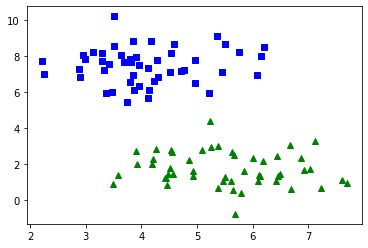

In [16]:
# Make a linearly seperable dataset
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

In [169]:
print(X[44], y[44]) # 1 represent blue, 0 represent green

tensor([ 3.5086, 10.2121]) tensor([1.])


In [53]:
n_samples, n_features = X.shape
input_size = n_features
output_size = 1

In [159]:
# Setting hyper-parameters and loss functions
learning_rate = 0.01
n_iter = 200
loss = nn.BCELoss()

In [32]:
# Extra cell
true = torch.tensor([[1]], dtype=float)
predicted = torch.tensor([[0.99]], dtype=float)
print(loss(predicted, true))

tensor(0.0101, dtype=torch.float64)


* BCELoss = -ylog(x) - (1-y)log(1-x)
* log is with a base 'e'

In [154]:
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

In [161]:
model = LogisticRegression(input_size) # Create object of model

In [162]:
# must be initialized after model initialization
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [163]:
# Sample input output (Always remeber to use torch.no_grad while inference)
with torch.no_grad():
    x_test = torch.tensor([[1.231, 4.212]])
    y_predicted = model(x_test)
    print(y_predicted)

tensor([[0.7973]])


In [120]:
import numpy as np

In [ ]:
# convert numpy into torch tensor
X = torch.from_numpy(X.astype(np.float32)) 
y = torch.from_numpy(y.astype(np.float32)) #

In [128]:
y.shape

torch.Size([100])

In [147]:
y = y.view(100,1)
y.shape

torch.Size([100, 1])

In [165]:
for epoch in range(n_iter):
    # Fwd pass and loss calcn
    y_predicted = model(X) 
    l = loss(y_predicted, y)
    
    #bkw pass
    l.backward()
    
    #update weights
    optimizer.step()
    
    #zero grad
    optimizer.zero_grad()
    
    if(epoch%10 == 9):
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: loss = {l:.8f}')

epoch 10: loss = 1.24256945
epoch 20: loss = 0.81212091
epoch 30: loss = 0.60804063
epoch 40: loss = 0.49266165
epoch 50: loss = 0.41426125
epoch 60: loss = 0.35725510
epoch 70: loss = 0.31426603
epoch 80: loss = 0.28089035
epoch 90: loss = 0.25432169
epoch 100: loss = 0.23271099
epoch 110: loss = 0.21480499
epoch 120: loss = 0.19973102
epoch 130: loss = 0.18686602
epoch 140: loss = 0.17575508
epoch 150: loss = 0.16605908
epoch 160: loss = 0.15752046
epoch 170: loss = 0.14994040
epoch 180: loss = 0.14316307
epoch 190: loss = 0.13706471
epoch 200: loss = 0.13154581


In [166]:
with torch.no_grad():
    print(model(torch.tensor([[6.55, 1]])))
    

tensor([[0.0446]])


* classified [6.65, 1] as green: True